# supermarket analysis

i will do analysis about Supermarket sales , this data i get from kaggle website

In [1]:
import numpy as np
# NumPy to numerical operations
import pandas as pd
# pandas for operations about DataFrames
import seaborn as sns
# seaborn is a data visualization library
import matplotlib.pyplot as plt
# matplotlib is also a data visualisation library
%matplotlib inline
import warnings
# ignoring unnecessary warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset supermarket
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
market = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
market.head()
# shows the first 5 rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
market.tail()
#shows the last 5 rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
market.info()
#shows general information about all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
market.isnull().sum()
#shows if there are any missing values in our dataset

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
market.describe()
#shows statistical values of columns that are type int or float

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Handling with Dates

In [10]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
market["Date"]=pd.to_datetime(market["Date"])
#I converted the Date column type to DateTime from the object

In [12]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [13]:
market["day"]=(market["Date"]).dt.day
#I create a new column its name is day and then I extracted days from the Date column
market["month"]=(market["Date"]).dt.month
#I create a new column its name is month and then I extracted months from the Date column
market["year"]=(market["Date"]).dt.year
#I create a new column its name is year and then I extracted years from the Date column
market["month_name"]=(market["Date"]).dt.month_name()
#I create a new column its name is month_name and then I extracted month names from the Date column
market["weekday"]=(market["Date"]).dt.day_name()
#I create a new column its name is weekday and then I extracted weekday from the Date column

In [14]:
#look our data frame!
market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday


In [15]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [16]:
market["Time"]=pd.to_datetime(market["Time"])
#I converted the Time column type to DateTime from the object

In [17]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [18]:
market["Hour"]=(market["Time"]).dt.hour
#create a new column its name is Hour and then I extract hour info from the Time column

In [19]:
market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-01-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-01-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday,10


# Data Visualisation

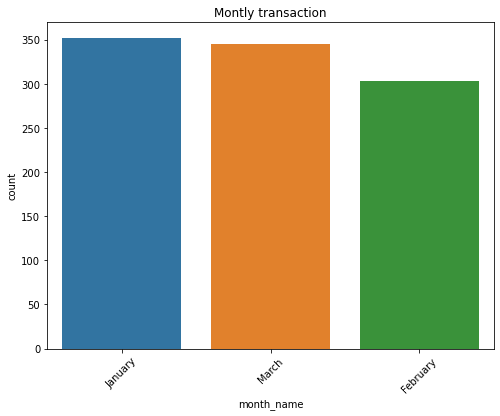

In [21]:
plt.figure(figsize=(8,6))
#setting size of the figure as (8,6). It means 8 from the x-axis and 6 from the y-axis
plt.title("Montly transaction")
#setting title of the graph
sns.countplot(x=market.month_name)
#Creating a count plot that counts months
plt.xticks(rotation=45); 
#setting rotation angle of months name

january is the highest one between feb and march on Montly transaction

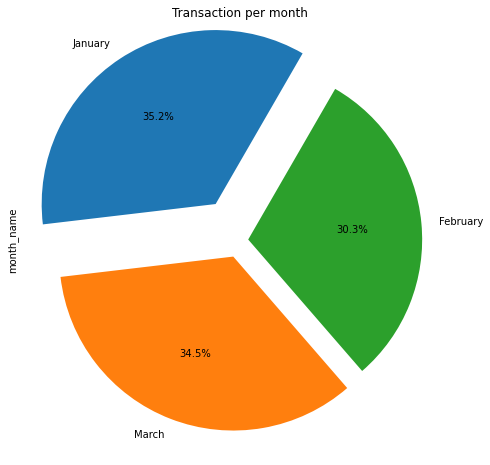

In [22]:
plt.figure(figsize=(8,8))
#In the pie plot, we make a square. As a consequence, I made that size (8,8).
explode=(0.25,0.10,0.05)
# Exploding is help us to see more clearly.
# I exploded the first thing more and third thing less.
market["month_name"].value_counts().plot.pie(autopct="%1.1f%%",startangle=60,explode=explode)
#We make a pie graph.
#starting from 60 degrees to putting values.
plt.title("Transaction per month");

As we can see, this supermarket has more customers in January than in the other two months.

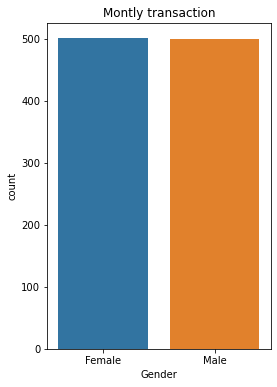

In [26]:
plt.figure(figsize=(4,6))
plt.title("Montly transaction")
sns.countplot(x=market["Gender"]);
#Creating count plot of Gender column.

not so different between male and female

In [27]:
market.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

the differences between female and male are just 2 person

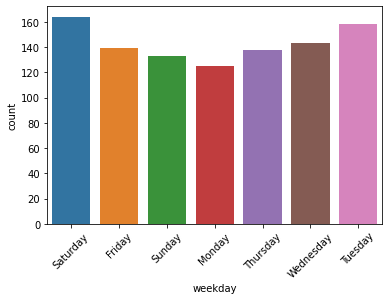

In [28]:
sns.countplot(x=market.weekday)
plt.xticks(rotation=45);
#rotating values at x axis

The busiest day is Saturday because it is everyone's holiday, and many people buy their needs for the week on Saturday.

However, Monday is the quietest day. Interestingly, Tuesday is the second busy day. Tuesday is more crowded than Sunday. why?

Maybe the food bought on Saturday is already finish.

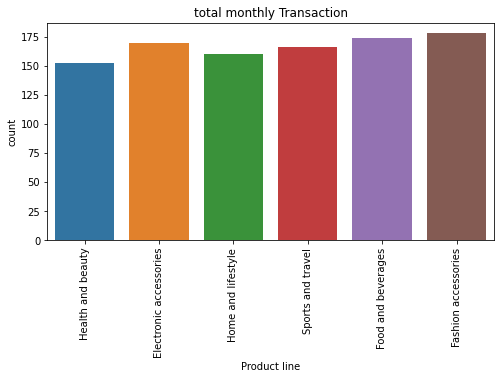

In [48]:
plt.figure(figsize=(8,4))
plt.title("total monthly Transaction")
sns.countplot(x=market["Product line"])
plt.xticks(rotation=90); 

the most total monthly transaction is fashion accessories .

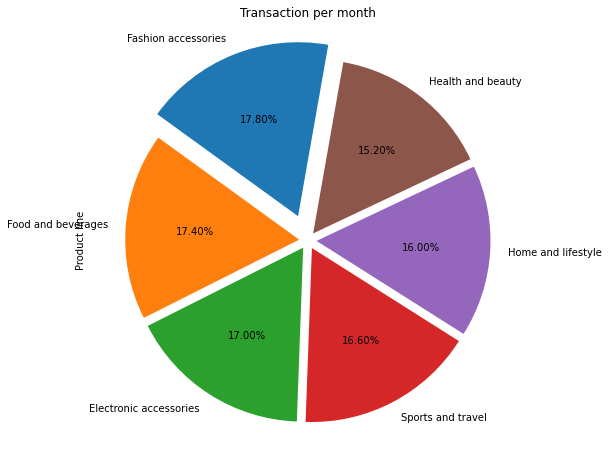

In [30]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

market["Product line"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode)
#  autopct="%1xf%%" 
#It means show "x" number after comma.

plt.title("Transaction per month");

Fashion accessories more than others, even more than food

Maybe we should look at the graph in terms of gender.

Fashion accessories is more than others product line , even more than food.

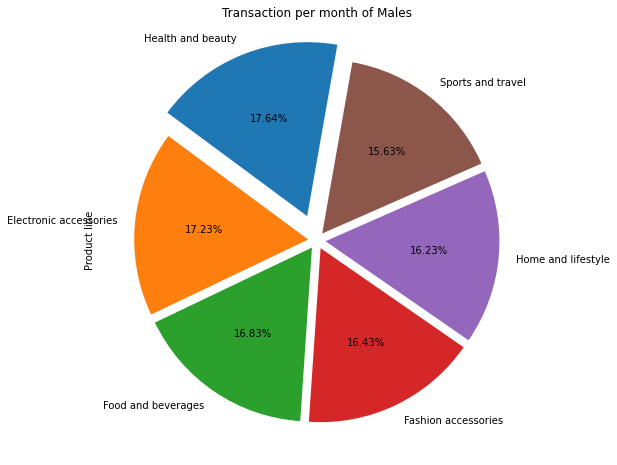

In [31]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

market["Product line"][market["Gender"]=="Male"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode,)

plt.title("Transaction per month of Males");

This graph shows the only male transaction per month.

Now the graph changed. Fashion accessories turned from first place to fourth place. And now the first place is Health and Beauty. 

Putting Electronic accessories near the Health and Beauty accessories could increase sales in the supermarkets!


this graph shows the only male transaction per month and we can the highest transaction of males is health and beauty .

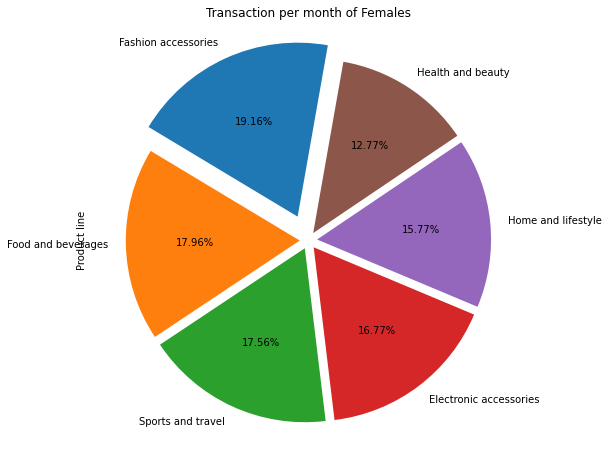

In [32]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

market["Product line"][market["Gender"]=="Female"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode,)

plt.title("Transaction per month of Females");

This graph shows the only female transaction per month.

As we expected, Fashion accessories are ahead by a wide margin.

this graph shows the only female transaction per month and we can the highest transaction of female is fashion accessories .

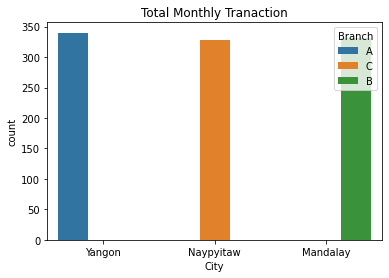

In [33]:
plt.title("Total Monthly Tranaction")
sns.countplot(x=market["City"],hue = market["Branch"]);

we can see the most customer are from Yangon city.

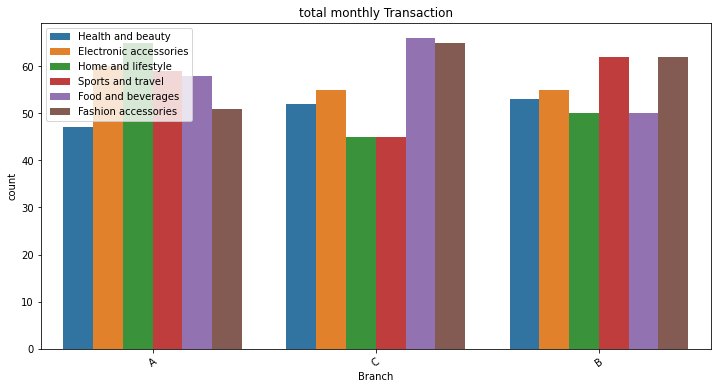

In [34]:
plt.figure(figsize=(12,6))
plt.title("total monthly Transaction")
sns.countplot(x=market["Branch"],hue=market["Product line"])
plt.xticks(rotation=35)
plt.legend(loc="best"); 
plt.show()

we can compare between every branch for product line . as we can see every branch have their popularity .

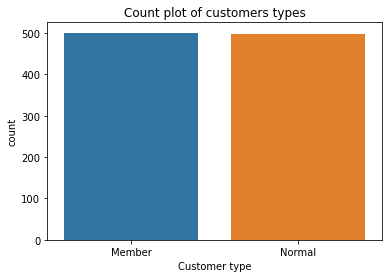

In [35]:
plt.title("Count plot of customers types")
sns.countplot(x=market["Customer type" ]);

almost the same value

In [36]:
market["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

There are just 2 person differences

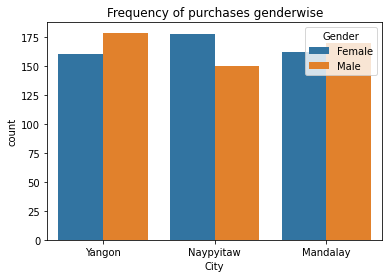

In [37]:
plt.title("Frequency of purchases genderwise")
sns.countplot(x=market.City,hue=market.Gender);
#Genders in terms of cities

we can see the most highest female are from naypitaw city , and male form yangon

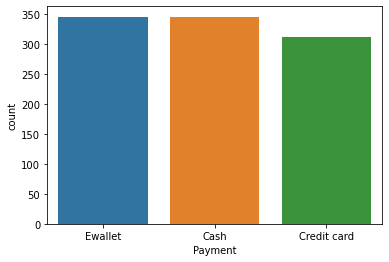

In [38]:
sns.countplot(x=market.Payment);

Credit Card is less customer to use between the others.

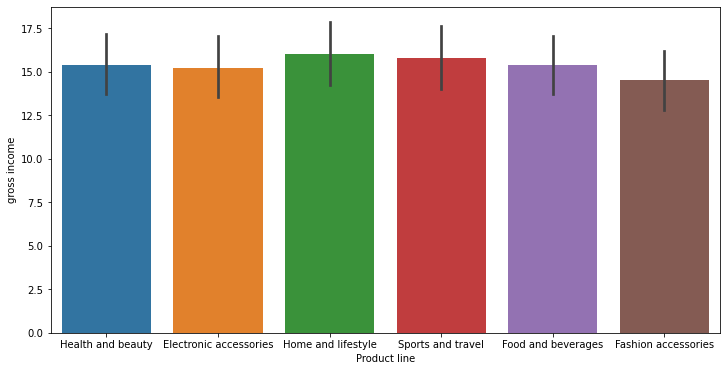

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=market["Product line"],y=market["gross income"]);

Home and lifestyle gross income is more than others.

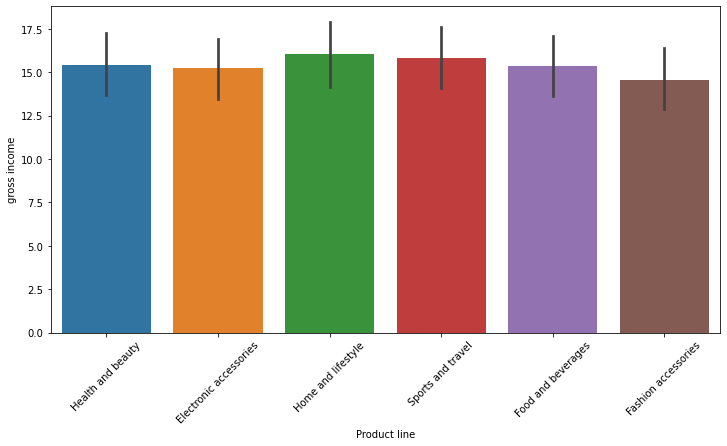

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=market["Product line"],y=market["gross income"])
plt.xticks(rotation=45);

Home and lifestyle gross income is more than others.

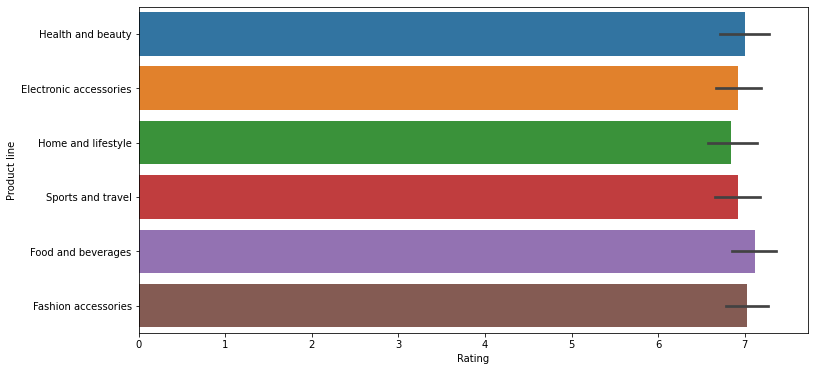

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(y=market["Product line"],x=market["Rating"]);

I think we can say no more thing about this graph no big differences between rating and product line

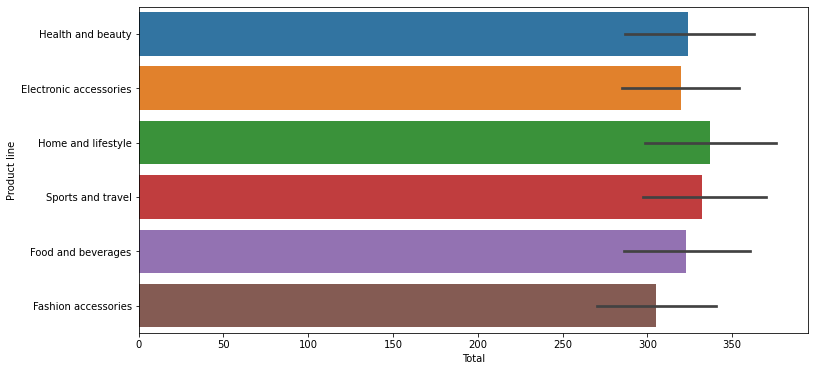

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=market["Total"],y=market["Product line"]);

We can say that maybe Home and lifestyle products are more expensive than other or when people buy these products quantities of products are more than others. In contrast, we can't find which is true

# the correlation

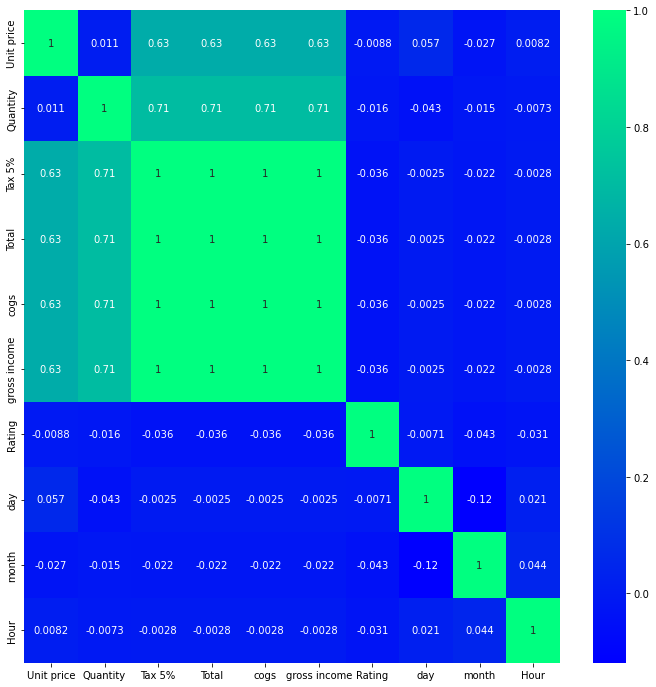

In [46]:
#To see more clearly, I will drop NaN columns.
plt.figure(figsize=(12,12))
sns.heatmap(market.drop(["gross margin percentage","year"],axis=1).corr(),annot=True,cmap="winter");